# Библиотека pandas

Pandas — программная библиотека на языке Python для обработки и анализа данных. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временными рядами. Название библиотеки происходит от эконометрического термина «панельные данные», используемого для описания многомерных структурированных наборов информации.

Библиотека pandas содержит набор модулей и функций, которые облегчают выполнения некоторых операций с использованием языка программирования Python. В нашем случае использование библиотеки облегчит предварительную обработку данных и последующий их анализ. Позволит получить хорошо структурированные и наглядные таблицы, содержащие статистические показатели, рассчитанные на основе данных.

Ссылки на шпаргалки:

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

При импортировании библиотеки pandas мы её переименовываем в pd, и в дальнейшем будем к ней обращаться по названию pd.

In [1]:
import pandas as pd

В pandas реализованы типы данных с разным числом измерений: 
- одномерный тип (просто ряд) — Series,
- двумерный (таблица) — DataFrame, 
- трёхмерный — Panel. 

### Открытие файла

Откроем файл с названием **brics**, у него разрешение **csv** (сomma-separated values). Для этого используем метод **read_csv**. Для открытия других типов файлов используются соответствующие методы:

- **read_excel** для файлов созданных в MS Excel и имеющих разрешения xls или xlsx;
- **read_html** для веб-страниц, написанных на языке HTML;
- **read_stata** для файлов, созданных в Stata и имеющих разрешение dta, и т.д.

Наряду с названием файла методу **read_csv** можно передать ряд параметров, определяющих порядок обработки данных при считывании из файла. Подробнее про параметры метода можно прочесть по ссылке https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [2]:
df = pd.read_csv("brics.csv") #считываем содержимое файла, в дальнейшем будем к нему обращаться по имени df
#файл находится в той же директории, что и текущий ноутбук

In [3]:
type(df) #функция type() возвращает тип объекта
#создан объект DataFrame

pandas.core.frame.DataFrame

In [4]:
df #отразим содержимое объекта с именем df

,id,country,capital,area,population
0,BR,Brasil,Brazilia,8.516,212.60
1,RU,Russia,Moscow,17.130,144.10
2,IN,India,New Delhi,3.287,1380.00
3,CH,China,Beijing,9.597,1402.00
4,SA,South Africa,Pretoria,1.221,59.31


Первая строка из файла автоматически становится индексами столбцов. У строк по умолчанию нет индексов, и им присваиваются номера начиная с 0 (левая колонка). Можно было бы загрузить файл так, чтобы первый столбец рассматривался как столбец с именами строк (индексами), для этого надо передать **pd.read_csv()** параметр **index_col** с номером нужного столбца.

In [5]:
df = pd.read_csv("brics.csv", index_col=0) 
# при считывании можно указать, что первая колонка станет индексами строк
#нумерация индексов столбцов и строк начинается с 0
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


Теперь столбец слева (индекс) состоит не из последовательных чисел, а из строк.

In [6]:
df = pd.read_csv("brics.csv")
df

,id,country,capital,area,population
0,BR,Brasil,Brazilia,8.516,212.60
1,RU,Russia,Moscow,17.130,144.10
2,IN,India,New Delhi,3.287,1380.00
3,CH,China,Beijing,9.597,1402.00
4,SA,South Africa,Pretoria,1.221,59.31


In [7]:
df = df.set_index('id') #можно поменять индекс строк не на этапе считывания данных из файла, а позднее
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


Строка датафрейма называется «наблюдением» (observation), а столбец — «переменной» (variable). Данные в столбце должны быть однородны (например, может быть столбец, состоящий только из чисел или только из строк (string), но не может быть столбца, в котором есть и текстовые, и числовые значения), а в отдельной сроке таблицы данные могут быть разнородны.

### Именованные ссылки и копирование

#### Ситуация 1: несколько имён у одного датафрейма

У нас есть объект DataFrame c именованной ссылкой на него "df". То есть, df - это имя объекта, у объекта может быть несколько имён. В этом случае, для обращения к нему можно использовать любое из них.

In [8]:
df = pd.read_csv("brics.csv", index_col=0) 
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


In [9]:
df2=df #у объекта df появляется второе имя (именованная ссылка на него) df2

In [10]:
df2

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


In [11]:
df2['new']='new' #меняем объект используя имя df2

In [12]:
df2 #выводим содержимое изменённого объекта

,country,capital,area,population,new
id,,,,,
BR,Brasil,Brazilia,8.516,212.60,new
RU,Russia,Moscow,17.130,144.10,new
IN,India,New Delhi,3.287,1380.00,new
CH,China,Beijing,9.597,1402.00,new
SA,South Africa,Pretoria,1.221,59.31,new


In [13]:
df #при обращении к объекту по имени df мы получаем тот же самый уже изменённый объект

,country,capital,area,population,new
id,,,,,
BR,Brasil,Brazilia,8.516,212.60,new
RU,Russia,Moscow,17.130,144.10,new
IN,India,New Delhi,3.287,1380.00,new
CH,China,Beijing,9.597,1402.00,new
SA,South Africa,Pretoria,1.221,59.31,new


#### Ситуация 2: копирование датафрейма с присвоением копии другого имени  

Мы можем на основе существующего объекта создать его копию (второй объект). У них будут разные имена, и модификация одного из объектов не повлияет на другой.

In [14]:
df = pd.read_csv("brics.csv", index_col=0) #заново считываем файл

In [15]:
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


In [16]:
df3=df.copy() #создаём копию датафрейма присваивая ей имя df3

In [17]:
df3

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


In [18]:
df3['new']=0 #меняем датафрейм, имеющий имя df3

In [19]:
df3

,country,capital,area,population,new
id,,,,,
BR,Brasil,Brazilia,8.516,212.60,0
RU,Russia,Moscow,17.130,144.10,0
IN,India,New Delhi,3.287,1380.00,0
CH,China,Beijing,9.597,1402.00,0
SA,South Africa,Pretoria,1.221,59.31,0


In [20]:
df #объект с именем df не поменялся

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


### Информация о содержимом датафрейма

In [21]:
df.info() #сводная информация о числе строк, названиях столбцов и типах данных в них

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, BR to SA
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   capital     5 non-null      object 
 2   area        5 non-null      float64
 3   population  5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


В выводе выше указано, что в датафрейме содержаться 5 строк (5 entries) и 4 колонки (4 columns). Указаны названия колонок, их тип и число ненулевых значений в каждой колонке. Для строковых переменных тип данных object, для столбцов, содержащих числа с плавающей точкой, тип данных float64.

### Вывод отдельных строк, столбцов и значений

In [22]:
df['area']

id
BR     8.516
RU    17.130
IN     3.287
CH     9.597
SA     1.221
Name: area, dtype: float64

In [23]:
#можно вывести столбец, указав его индекс
df[['area']]

,area
id,
BR,8.516
RU,17.130
IN,3.287
CH,9.597
SA,1.221


In [24]:
#можно вывести несколько столбцов, указав их индексы в любом порядке
#при этом один столбец можно вывести несколько раз 
df[['area', 'country', 'area']]

,area,country,area
id,,,
BR,8.516,Brasil,8.516
RU,17.130,Russia,17.130
IN,3.287,India,3.287
CH,9.597,China,9.597
SA,1.221,South Africa,1.221


In [25]:
#можно вывести строку, указав её индекс, при этом нужно использовать метод loc
df.loc[['RU']]

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.13,144.1


In [26]:
#можно вывести несколько строк, перечислив их индексы
#при этом можно вывести строку несколько раз
df.loc[['RU', 'SA', 'BR', 'RU']]

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.130,144.10
SA,South Africa,Pretoria,1.221,59.31
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10


Метод **at** позволяет обратиться к конкретному элементу таблицы по индексу строки и столбца

In [27]:
df.at['RU', 'capital'] #обращение к конкретному элементу таблицы
#сначала передаём индекс строки, а потом индекс столбца
#работает быстрее, чем loc, если нужно найти одно значение

'Moscow'

In [28]:
df.loc['RU', 'capital'] #обращение к конкретному элементу таблицы
#сначала передаём индекс строки, а потом индекс столбца

'Moscow'

In [29]:
df['capital']['RU'] #ещё один вариант получения значения на пересечении столбца и строки

'Moscow'

In [30]:
df.loc[['RU', 'BR'], ['capital', 'population']]
#позволяет вернуть ячейки на пересечении нескольких строк и столбцов

,capital,population
id,,
RU,Moscow,144.1
BR,Brazilia,212.6


In [31]:
df.loc[['RU', 'BR'], :]
#вместо списка столбцов можно передать :, что означает "все столбцы"

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.130,144.1
BR,Brasil,Brazilia,8.516,212.6


In [32]:
df.loc[:, ['capital', 'population']]
#вместо списка строк можно передать :, что означает "все строки"

,capital,population
id,,
BR,Brazilia,212.60
RU,Moscow,144.10
IN,New Delhi,1380.00
CH,Beijing,1402.00
SA,Pretoria,59.31


Метод **.loc[]** работает с установленными индексами строк и столбцов, а если необходимо использовать их порядковые номера, то используется метод **iloc[]**.

In [33]:
df.iloc[[1]] # вторая строка

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.13,144.1


In [34]:
df.iloc[1, 2] # ячейка во второй строке, третьем столбце

17.13

Аналогично метод **.at[]** позволяет найти значение по установленным индексам строки и столбца. А методу **.iat []** передаются порядковые номера строки и столбца.  

In [35]:
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


In [36]:
df.at['RU', 'capital']

'Moscow'

In [37]:
df.iat[1, 1] #второй столбец, вторая строка

'Moscow'

In [38]:
#узнать индекс строки
print(df.index.get_loc('RU'))
print(df.index.get_loc('CH'))

1
3


In [39]:
#узнать индекс столбца
print(df.columns.get_loc('capital'))
print(df.columns.get_loc('population'))

1
3


### Работа с индексами столбцов и строк

Можно вывести индексы столбцов и строк в виде списка.

In [40]:
df.index #вывести индексы строк

Index(['BR', 'RU', 'IN', 'CH', 'SA'], dtype='object', name='id')

In [41]:
df.columns #вывести индексы столбцов

Index(['country', 'capital', 'area', 'population'], dtype='object')

Можно изменить индексы столбцов

In [42]:
df.columns = ['country_new', 'capital_new', 'area_old', 'populat_new']  #изменяем индексы столбцов
df

,country_new,capital_new,area_old,populat_new
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


Слово id при отображении датафрейма — имя столбца с индексами. Можно его удалить

In [43]:
df.index.name = None #убрать имя столбца с индексами

In [44]:
df

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


### Срезы

In [45]:
df

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,144.10
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


In [46]:
df[2:4] # срез по срокам на основе числовых индексов
#нумерация начинаются с 0, последний элемент не включается в вывод

,country_new,capital_new,area_old,populat_new
IN,India,New Delhi,3.287,1380.0
CH,China,Beijing,9.597,1402.0


In [47]:
df['RU':'CH']# срез по срокам на основе текстовых индексов, крайние элементы включены в вывод

,country_new,capital_new,area_old,populat_new
RU,Russia,Moscow,17.130,144.1
IN,India,New Delhi,3.287,1380.0
CH,China,Beijing,9.597,1402.0


In [48]:
df[0:1] #первая строка

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.6


In [49]:
df[:3] #первые три строки, начальный элемент среза не указан

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.6
RU,Russia,Moscow,17.130,144.1
IN,India,New Delhi,3.287,1380.0


In [50]:
df[-3:] #последние три строки

,country_new,capital_new,area_old,populat_new
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


In [51]:
df[2:] #последние три строки

,country_new,capital_new,area_old,populat_new
IN,India,New Delhi,3.287,1380.00
CH,China,Beijing,9.597,1402.00
SA,South Africa,Pretoria,1.221,59.31


# Титаник

Данные о файле:  https://www.kaggle.com/hesh97/titanicdataset-traincsv

Описание переменных:

    PassengerId - id пассажира
    Survived бинарная переменная: выжил пассажир (1) или нет (0)
    Pclass - класс пассажира
    Name - имя пассажира
    Sex - пол пассажира
    Age - возраст пассажира
    SibSp - количество родственников (братьев, сестер, супругов) пассажира на борту
    Parch - количество родственников (родителей / детей) пассажира на борту
    Ticket - номер билета
    Fare - тариф (стоимость билета)
    Cabin - номер кабины
    Embarked - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q - Queenstown)

## 1. Загрузка данных

In [52]:
titanic = pd.read_csv('titanic.csv', index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [53]:
# Прочитать из файла CSV 10 первых строк и колонки 'Name', 'Sex', 'Survived'
titanic_try = pd.read_csv('titanic.csv', index_col=0, nrows=10, usecols=['Name', 'Sex', 'Survived'])
titanic_try

,Name,Sex
Survived,,
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
1,"Heikkinen, Miss. Laina",female
1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
0,"Allen, Mr. William Henry",male
0,"Moran, Mr. James",male
0,"McCarthy, Mr. Timothy J",male
0,"Palsson, Master. Gosta Leonard",male
1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female


## 2. Информация о датасете

In [54]:
titanic.info()#информация о содержимом датафрейма

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [55]:
titanic.head(7)#отобразить первые пять записей

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [56]:
titanic.head(3)#отобразить первые три записи

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [57]:
titanic.tail()#отобразить последние 5 записей

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
titanic.tail(7)#отобразить последние 7 записей

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [59]:
titanic.shape #число строк и столбцов

(891, 11)

In [60]:
titanic.shape[0] #число строк

891

In [61]:
titanic.dtypes #тип данных в каждом столбце

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

## 3. Описательная статистика

In [62]:
titanic.describe() #общая статистика рассчитывается только для количественных переменных

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
titanic[['Age', 'Fare']].describe() #для выбранных столбцов

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [64]:
titanic[titanic['Age'] > 60].describe() #статистика для подвыборки из людей старше 60

,Survived,Pclass,Age,SibSp,Parch,Fare
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214
std,0.428932,0.854071,5.024884,0.351250,0.882735,54.783357
min,0.000000,1.000000,61.000000,0.000000,0.000000,6.237500
25%,0.000000,1.000000,62.000000,0.000000,0.000000,10.500000
50%,0.000000,1.000000,64.500000,0.000000,0.000000,26.550000
75%,0.000000,2.000000,70.000000,0.000000,0.000000,45.791700
max,1.000000,3.000000,80.000000,1.000000,4.000000,263.000000


In [65]:
titanic['Age'] > 30

PassengerId
1      False
2       True
3      False
4       True
5       True
       ...  
887    False
888    False
889    False
890    False
891     True
Name: Age, Length: 891, dtype: bool

In [68]:
titanic.mean(numeric_only=True) #средние показатели рассчитываются только по столбцам, содержащим количественные данные

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [70]:
titanic.min(numeric_only=True) #минимальные значения по столбцам

Survived    0.00
Pclass      1.00
Age         0.42
SibSp       0.00
Parch       0.00
Fare        0.00
dtype: float64

In [71]:
titanic.max(numeric_only=True) #максимальные значения по столбцам

Survived      1.0000
Pclass        3.0000
Age          80.0000
SibSp         8.0000
Parch         6.0000
Fare        512.3292
dtype: float64

In [72]:
titanic[['Pclass']].mode()
#мода - самое часто встречающееся значение

,Pclass
0,3


In [73]:
titanic['Age'].median() #медиана

28.0

In [74]:
titanic['Age'].quantile(0.5) #медиана / 50-й перцентиль / 2-й квартиль

28.0

In [75]:
titanic['Age'].var() #дисперсия

211.0191247463081

In [76]:
titanic['Age'].std() #cреднеквадратическое отклонение

14.526497332334044

In [77]:
titanic['Age'].sem() #cтандартная ошибка среднего

0.5436404994496713

In [78]:
titanic['Age'].quantile(0.1) #10-й перцентиль / 1-й дециль

14.0

In [79]:
titanic['Age'].quantile(0.25) #25-й перцентиль / 1-й квартиль

20.125

In [80]:
titanic['Age'].quantile(0.75) #75-й перцентиль / 3-й квартиль

38.0

In [81]:
titanic['Age'].quantile(0.9) #90-й перцентиль, 9-й дециль

50.0

In [82]:
titanic['Age'].quantile(0.75) - titanic['Age'].quantile(0.25) #межквартильный размах

17.875

In [83]:
(titanic['Age'].quantile(0.75) - titanic['Age'].quantile(0.25))/2 #межквартильная широта

8.9375

In [84]:
titanic['Age'].quantile(0.9)/titanic['Age'].quantile(0.1) #децильное отношение

3.5714285714285716

In [85]:
titanic['Age'].mean() 

29.69911764705882

In [88]:
titanic[titanic['Age'] > 40].mean(numeric_only=True) 
#средние значения числовых столбцов, рассчитанные по строкам, отобранным по условию

Survived     0.366667
Pclass       1.760000
Age         51.066667
SibSp        0.320000
Parch        0.373333
Fare        42.204947
dtype: float64

In [89]:
titanic[titanic['Age'] > 40]['Age'].mean()
#среденее значение одного стобца, рассчитанное по строкам, отобранным по условию

51.06666666666667

In [90]:
titanic['Age'][(titanic['Survived'] == 1) & (titanic['Sex']=='female')].mean()

28.84771573604061

## 4. Сводные таблицы

Метод **groupby** позволяет группировать результаты расчётов по одной или нескольким переменным.

In [91]:
titanic.groupby('Sex')[['Age']].mean() #средний возраст с группировкой по полу

,Age
Sex,
female,27.915709
male,30.726645


In [92]:
titanic.groupby('Sex')[['Age']].agg(['mean', 'std']) #несколько статистических показателей

Age           
             mean        std
Sex                         
female  27.915709  14.110146
male    30.726645  14.678201

In [93]:
titanic.groupby('Pclass')[['Fare']].sum()#суммарная стоимость билетов по классам

,Fare
Pclass,
1,18177.4125
2,3801.8417
3,6714.6951


In [94]:
titanic.groupby('Pclass')[['Age']].std()
#стандартное отклонение возраста по классам

,Age
Pclass,
1,14.802856
2,14.001077
3,12.495398


In [95]:
titanic.groupby(['Sex', 'Pclass'])['Age'].mean().unstack() #средний возраст с группировкой по полу и классу

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [96]:
titanic.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

Метод **pivot_table** позволяет создавать сводные таблицы. В примере ниже методу pivot_table передаются три параметра: 
1. переменная по которой считается статистика (по умолчанию среднее арифметическое),
2. переменная для группировки значений среднего по строкам,
3. переменная для группировки значений среднего по столбцам.

In [97]:
titanic.pivot_table('Age', index='Sex', columns='Pclass') #средний возраст с группировкой по полу и классу

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [102]:
titanic.pivot_table('Age', index='Sex', columns='Survived', aggfunc='max')
#если вместо среднего арифметического нужно посчитать максимальное значение, то добавляется параметр aggfunc=max

Survived,0,1
Sex,,
female,57.0,63.0
male,74.0,80.0


In [103]:
titanic.pivot_table('Age', index=['Sex', 'Pclass'], columns=['Survived','Parch'])
#группировка по строкам по двум переменным

Survived               0                                                     \
Parch                  0          1          2     3     4          5     6   
Sex    Pclass                                                                 
female 1       50.000000        NaN  13.500000   NaN   NaN        NaN   NaN   
       2       38.000000  26.000000        NaN   NaN   NaN        NaN   NaN   
       3       25.407407  20.400000  12.363636  48.0  37.0  39.666667  43.0   
male   1       44.478723  46.100000  34.666667   NaN  64.0        NaN   NaN   
       2       33.385135  33.571429  32.500000   NaN   NaN        NaN   NaN   
       3       29.063536  17.904762  12.850000  16.0  40.0  39.000000   NaN   

Survived               1                                    
Parch                  0          1          2     3     5  
Sex    Pclass                                               
female 1       36.036364  38.812500  23.818182   NaN   NaN  
       2       31.276316  24.588235  20.454545  39.0   NaN  
       3       22.629630  11.681818  15.285714  24.0  38.0  
male   1       39.516129  39.000000  13.784000   NaN   NaN  
       2       36.666667   2.642857   0.915000   NaN   NaN  
       3       27.275862   7.070000   4.333333   NaN   NaN

In [104]:
titanic.pivot_table(index=['Pclass'], values=['Age', 'Fare'], aggfunc=['mean', 'median'])
#ещё один вариант группировки статистик

mean            median         
              Age       Fare    Age     Fare
Pclass                                      
1       38.233441  84.154687   37.0  60.2875
2       29.877630  20.662183   29.0  14.2500
3       25.140620  13.675550   24.0   8.0500

## 5. Частотный анализ данных

In [105]:
titanic['Age'].value_counts().to_frame() #частотная таблица, по умолчианию отсортирована по убыванию частот

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [106]:
titanic['Pclass'].value_counts(sort=False).to_frame() #частотная таблица, отсортированная по значениям переменной

,count
Pclass,
3,491
1,216
2,184


In [107]:
titanic.groupby('Pclass').size() #аналогичный результат

Pclass
1    216
2    184
3    491
dtype: int64

In [108]:
titanic['Embarked'].value_counts().to_frame()#пропущенные значения игнорируются

,count
Embarked,
S,644
C,168
Q,77


In [109]:
titanic['Embarked'].value_counts(dropna=False).to_frame()#пропущенные значения не игнорируются

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [110]:
titanic.groupby('Sex')['Pclass'].value_counts().to_frame() #частотная таблица с группировкой

count
Sex    Pclass       
female 3         144
       1          94
       2          76
male   3         347
       1         122
       2         108

In [111]:
titanic['Sex'].value_counts(normalize=True).to_frame() #вместо частот отображаются проценты

,proportion
Sex,
male,0.647587
female,0.352413


In [112]:
titanic['Pclass'].unique() #выводит уникальные значения в столбце

array([3, 1, 2], dtype=int64)

## 6. Графический анализ данных

При построении гистограммы множество значений признака разбивается на k интервалов, эти интервалы становятся основаниями столбцов. Высота столбца пропорциональна количеству (частоте) значений признака, попадающих в соответствующий интервал.

<Axes: >

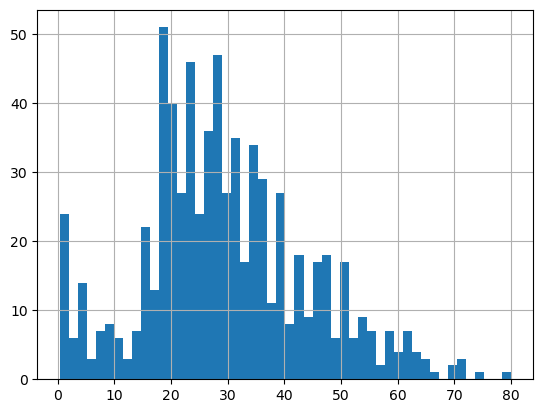

In [113]:
titanic.Age.hist(bins=50) #гистограмма по переменной Age
#параметр bins определяет число столбиков

<Axes: >

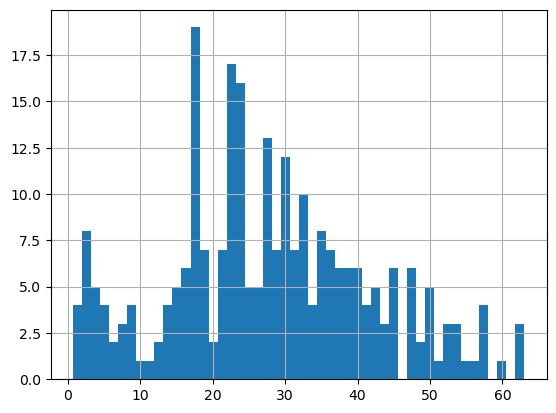

In [114]:
#гистограмма распределения возраста только по женщинам
titanic[titanic.Sex=='female'].Age.hist(bins=50)

Для категориальных переменнных лучше строить столбчатую или круговую диаграмму.

<Axes: xlabel='Pclass'>

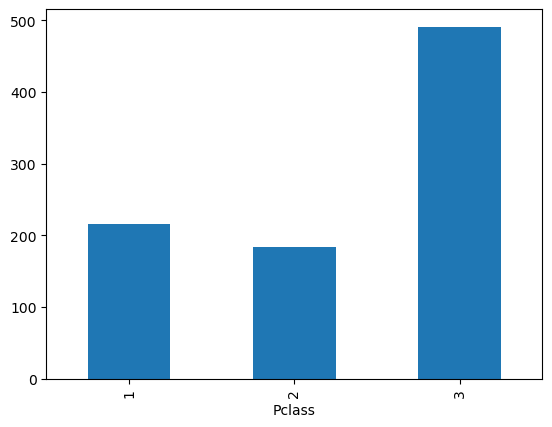

In [115]:
titanic.groupby('Pclass').size().plot(kind='bar')

<Axes: title={'center': 'Passenger Class'}>

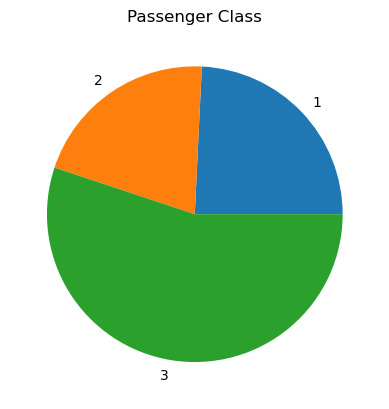

In [116]:
titanic.groupby('Pclass').size().plot(kind='pie', title = 'Passenger Class') #у графика есть название

Построим графики, отражающие распределение выживших среди мужчин и женщин - столбчатую диаграмму с группировкой (bar) и с накоплением (stacked).

In [117]:
titanic.groupby(['Survived'])['Sex'].value_counts().unstack()

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Survived'>

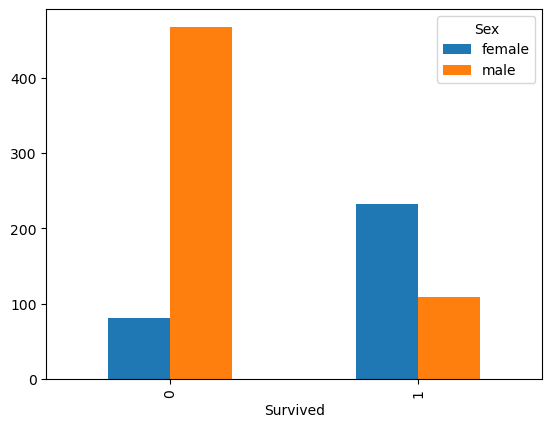

In [118]:
titanic.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind='bar')
#столбиковая диаграмма с группировкой

<Axes: xlabel='Survived'>

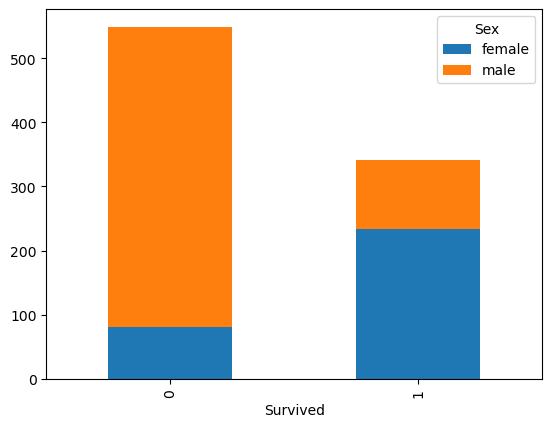

In [119]:
titanic.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind='bar', stacked=True)
#столбиковая диаграмма с накоплением (stacked)

In [120]:
titanic.groupby(['Survived'])['Sex'].value_counts().unstack()

Sex,female,male
Survived,,
0,81,468
1,233,109


In [121]:
titanic.groupby(['Survived'])['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

При использовании groupby добавляется новый уровень к индексу столбца (мультииндекс), **unstack** избавляется от второго уровня индекса и добавляет его к столбцам. Для облегчения работы с таблицами и построения графиков нередко проще использовать unstack.

<Axes: xlabel='Age', ylabel='Fare'>

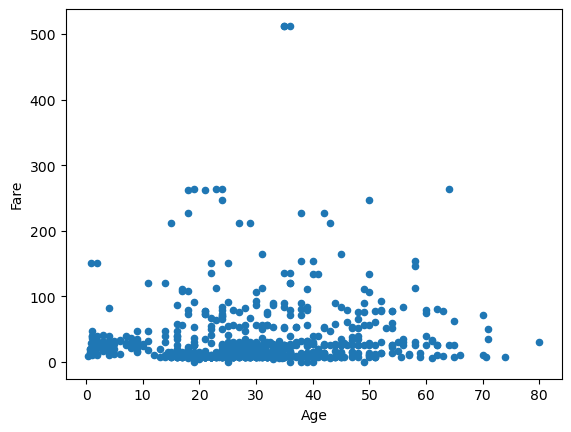

In [122]:
titanic.plot.scatter(x = 'Age', y = 'Fare') #диаграмма рассеяния

<Axes: >

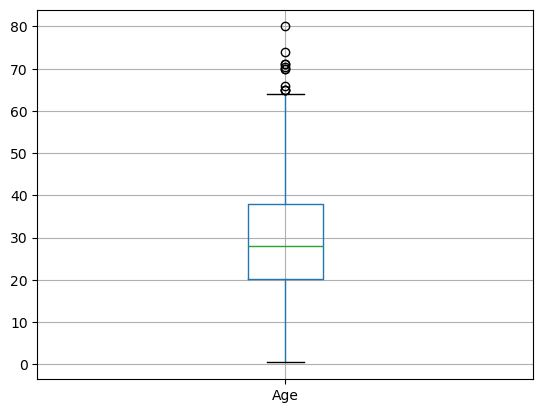

In [123]:
titanic.boxplot(column='Age') #ящичковая диаграмма

<Axes: title={'center': 'Age'}, xlabel='Pclass'>

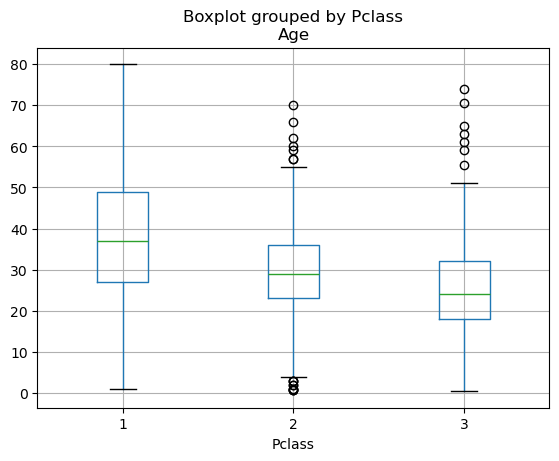

In [124]:
titanic.boxplot(column='Age', by='Pclass') #ящичковая диаграмма с группировкой

## Сравнение распределения с нормальным 

In [125]:
import seaborn as sns # импор тируем библиотеку под именем sns

C:\Users\amelikyan\AppData\Local\Temp\ipykernel_7284\1054176973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Age.dropna())


<Axes: xlabel='Age', ylabel='Density'>

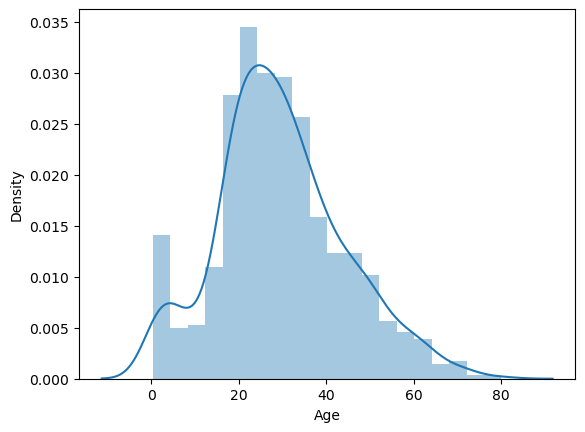

In [132]:
sns.distplot(titanic.Age.dropna())  
# применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным
# методом .dropna() опускаем ячейки с пропущенными значениями, иначе график не построится

C:\Users\amelikyan\AppData\Local\Temp\ipykernel_7284\1733429806.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Age.dropna(), fit=norm)  # параметр fit строит нам еще один график поверх существующего,


<Axes: xlabel='Age', ylabel='Density'>

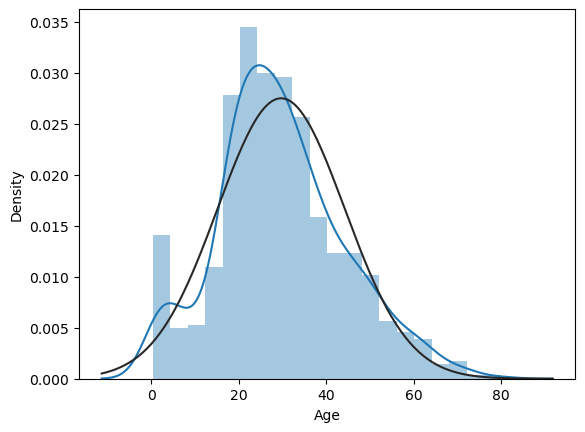

In [131]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(titanic.Age.dropna(), fit=norm)  # параметр fit строит нам еще один график поверх существующего, 
                                           # сейчас мы просим его построить нормальное распределение 

C:\Users\amelikyan\AppData\Local\Temp\ipykernel_7284\4065957278.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Fare.dropna(), fit=norm)


<Axes: xlabel='Fare', ylabel='Density'>

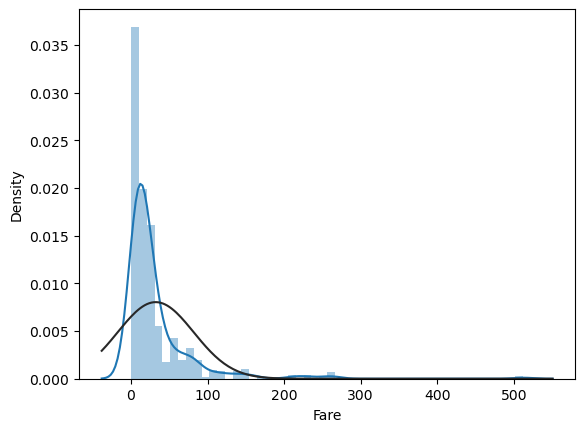

In [133]:
sns.distplot(titanic.Fare.dropna(), fit=norm)
#Распределение цены былетов относительно нормального распределения

In [134]:
titanic.Fare.skew()#асимметрия

4.787316519674893

In [135]:
titanic.Fare.kurtosis()#эксцесс

33.39814088089868